# Import libraries

In [1]:
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pacmap
import scipy.stats as stats

# Plotting Function

In [3]:
def helper_plot_clusters(clust_obj, clust_algo, dimensions = 10, clusters = 4):
    
    # Open dataset of dimensions genes and convert to transposed matrix
    data = "../Data/Variance/most_variable_" + str(dimensions) + ".csv"
    var_genes = pd.read_csv(data, index_col="Unnamed: 0").T

    clust_obj.fit(var_genes)

    # Visualization 2-D
    embedding_2 = pacmap.PaCMAP(n_neighbors=40, random_state=42) 
    pacmap_2_axes = embedding_2.fit_transform(var_genes.values)
    plt.scatter(pacmap_2_axes[:,0], pacmap_2_axes[:,1], c=clust_obj.labels_)
    plt.title("Top " + str(dimensions) + " genes within " + str(clusters) + " clusters by " + clust_algo + ", 2-D")
    plt.savefig("../Figures/Assg_3/Clustering/" + clust_algo + "_top_" + str(dimensions) + "_clusternum_" + str(clusters) + "_2_dim", bbox_inches="tight")
    plt.show()
    
    # Visualization 3-D
    
    embedding_3 = pacmap.PaCMAP(n_components=3, n_neighbors=40) 
    pacmap_3_axes = embedding_3.fit_transform(var_genes.values, init="pca")
    ax = plt.axes(projection ="3d")
    ax.scatter3D(pacmap_3_axes[:,0], pacmap_3_axes[:,1], pacmap_3_axes[:,2], c = clust_obj.labels_)
    plt.title("Top " + str(dimensions) + " genes within " + str(clusters) + " clusters by " + clust_algo + ", 3-D")
    plt.savefig("../Figures/Assg_3/Clustering/" + clust_algo + "_top_" + str(dimensions) + "_clusternum_" + str(clusters) + "_3_dim", bbox_inches="tight")
    plt.show()

Declare a wrapper function for the helper plot_clusters which hides the details and permits picking between KMeans and KMedoids clustering

In [4]:
def plot_clusters(clust_algo, dimensions = 10, clusters = 4):
    if (clust_algo == 'KMeans'):
        clust_obj = KMeans(n_clusters=clusters, random_state=0)
    if (clust_algo == 'KMedoids'):
        clust_obj = KMedoids(n_clusters=clusters, method='pam', init='random', random_state=1234)
    helper_plot_clusters(clust_obj, clust_algo, dimensions, clusters)

[KMeans library from SciKit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

C:\Users\mazhu\AppData\Roaming\Python\Python310\site-packages\pacmap\pacmap.py:774: UserWarning: Warning: random state is set to 42
  warnings.warn(f'Warning: random state is set to {_RANDOM_STATE}')


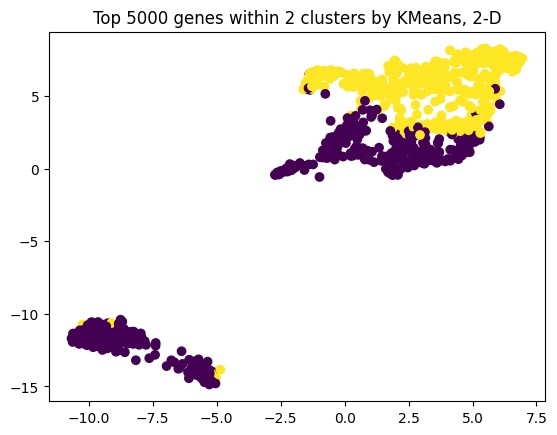

C:\Users\mazhu\AppData\Roaming\Python\Python310\site-packages\pacmap\pacmap.py:778: UserWarning: Warning: random state is removed
  warnings.warn(f'Warning: random state is removed')


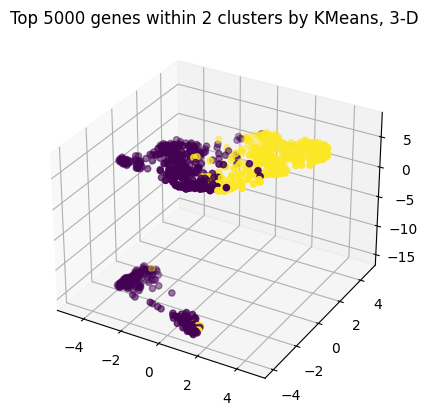

In [6]:
plot_clusters('KMeans', dimensions=5000, clusters=2)

PAM Clustering using [scikit Kmedoids](https://scikit-learn-extra.readthedocs.io/en/stable/install.html)

C:\Users\mazhu\AppData\Roaming\Python\Python310\site-packages\pacmap\pacmap.py:774: UserWarning: Warning: random state is set to 42
  warnings.warn(f'Warning: random state is set to {_RANDOM_STATE}')


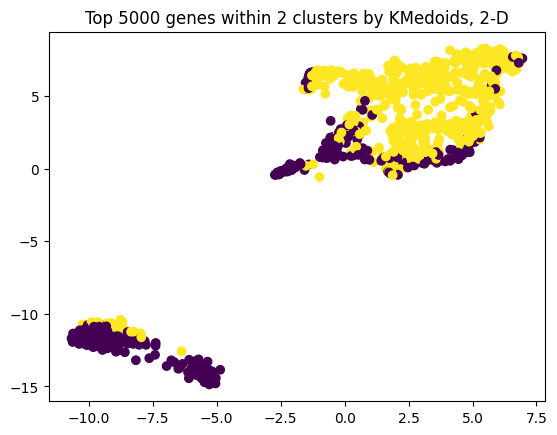

C:\Users\mazhu\AppData\Roaming\Python\Python310\site-packages\pacmap\pacmap.py:778: UserWarning: Warning: random state is removed
  warnings.warn(f'Warning: random state is removed')


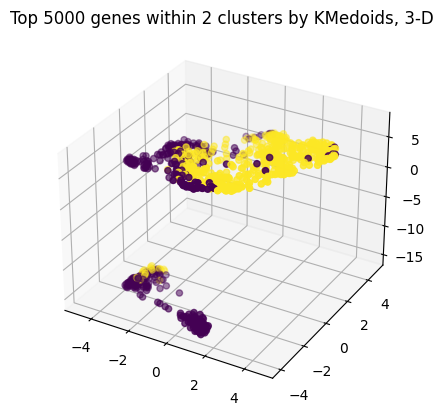

C:\Users\mazhu\AppData\Roaming\Python\Python310\site-packages\pacmap\pacmap.py:774: UserWarning: Warning: random state is set to 42
  warnings.warn(f'Warning: random state is set to {_RANDOM_STATE}')


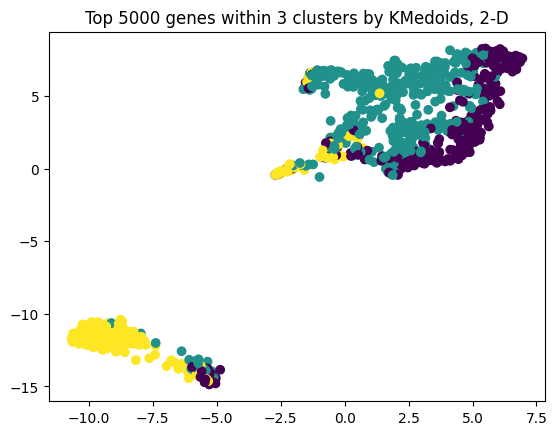

C:\Users\mazhu\AppData\Roaming\Python\Python310\site-packages\pacmap\pacmap.py:778: UserWarning: Warning: random state is removed
  warnings.warn(f'Warning: random state is removed')


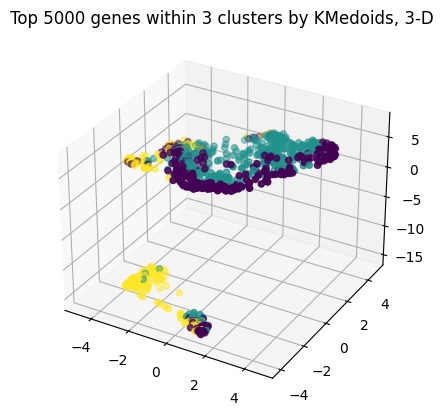

C:\Users\mazhu\AppData\Roaming\Python\Python310\site-packages\pacmap\pacmap.py:774: UserWarning: Warning: random state is set to 42
  warnings.warn(f'Warning: random state is set to {_RANDOM_STATE}')


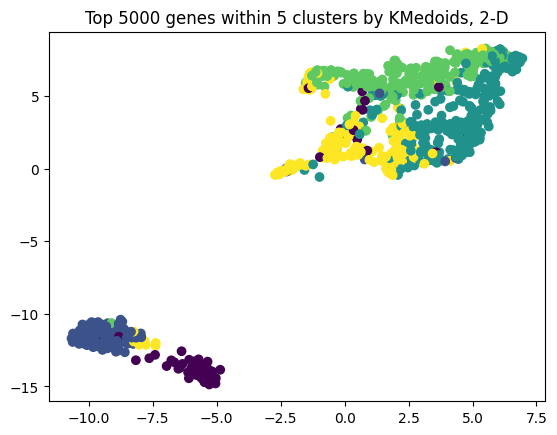

C:\Users\mazhu\AppData\Roaming\Python\Python310\site-packages\pacmap\pacmap.py:778: UserWarning: Warning: random state is removed
  warnings.warn(f'Warning: random state is removed')


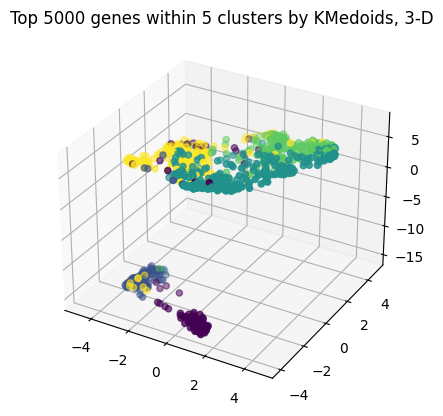

C:\Users\mazhu\AppData\Roaming\Python\Python310\site-packages\pacmap\pacmap.py:774: UserWarning: Warning: random state is set to 42
  warnings.warn(f'Warning: random state is set to {_RANDOM_STATE}')


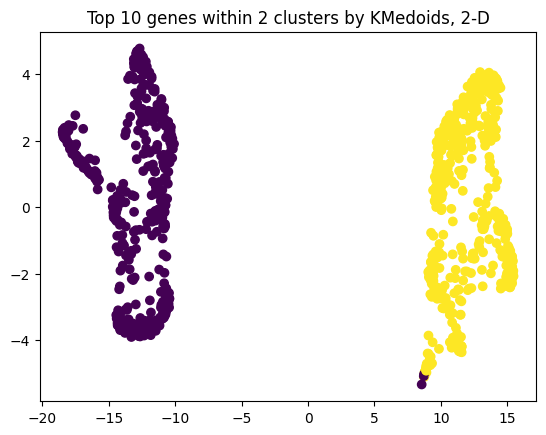

C:\Users\mazhu\AppData\Roaming\Python\Python310\site-packages\pacmap\pacmap.py:778: UserWarning: Warning: random state is removed
  warnings.warn(f'Warning: random state is removed')


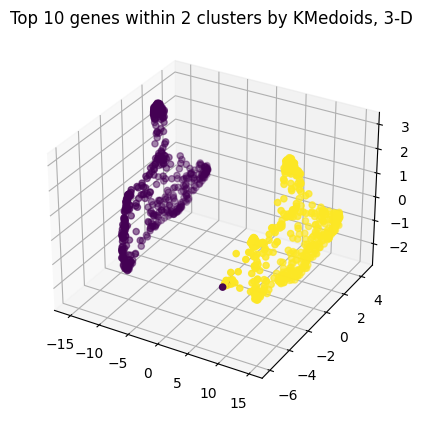

C:\Users\mazhu\AppData\Roaming\Python\Python310\site-packages\pacmap\pacmap.py:774: UserWarning: Warning: random state is set to 42
  warnings.warn(f'Warning: random state is set to {_RANDOM_STATE}')


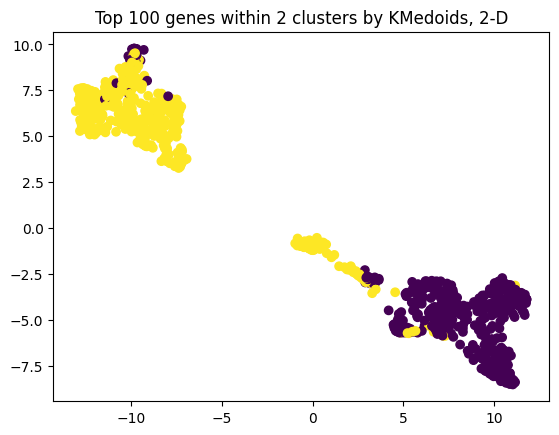

C:\Users\mazhu\AppData\Roaming\Python\Python310\site-packages\pacmap\pacmap.py:778: UserWarning: Warning: random state is removed
  warnings.warn(f'Warning: random state is removed')


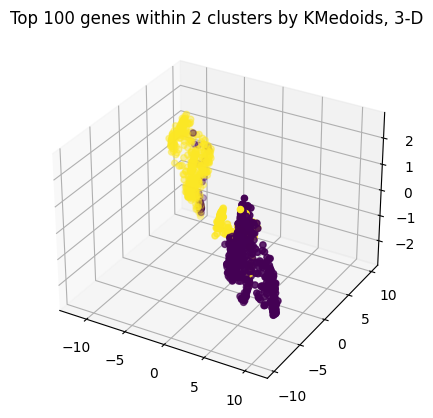

C:\Users\mazhu\AppData\Roaming\Python\Python310\site-packages\pacmap\pacmap.py:774: UserWarning: Warning: random state is set to 42
  warnings.warn(f'Warning: random state is set to {_RANDOM_STATE}')


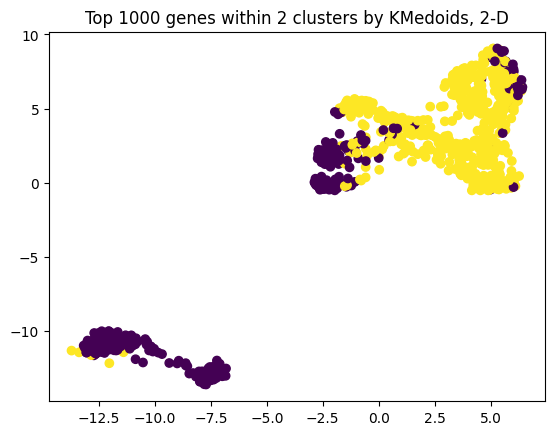

C:\Users\mazhu\AppData\Roaming\Python\Python310\site-packages\pacmap\pacmap.py:778: UserWarning: Warning: random state is removed
  warnings.warn(f'Warning: random state is removed')


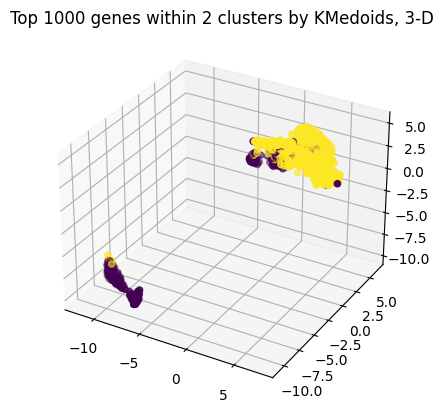

C:\Users\mazhu\AppData\Roaming\Python\Python310\site-packages\pacmap\pacmap.py:774: UserWarning: Warning: random state is set to 42
  warnings.warn(f'Warning: random state is set to {_RANDOM_STATE}')


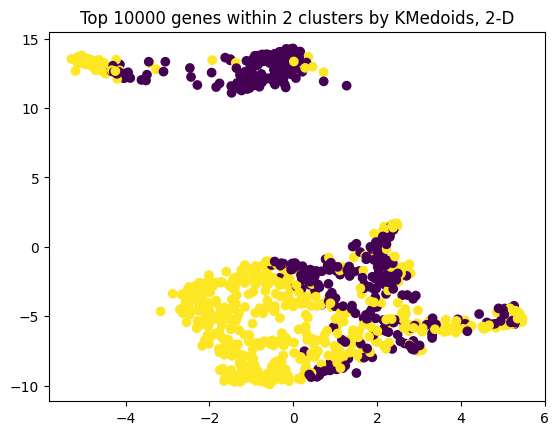

C:\Users\mazhu\AppData\Roaming\Python\Python310\site-packages\pacmap\pacmap.py:778: UserWarning: Warning: random state is removed
  warnings.warn(f'Warning: random state is removed')


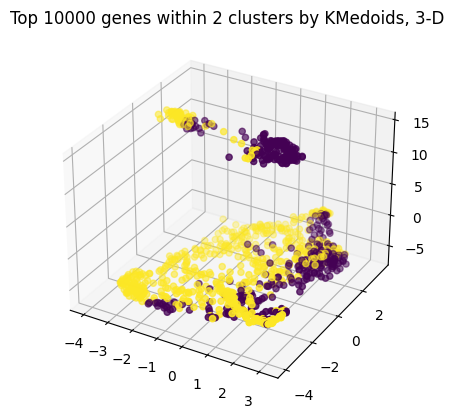

In [17]:
plot_clusters('KMedoids', dimensions = 5000, clusters = 2)
plot_clusters('KMedoids', dimensions = 5000, clusters = 3)
plot_clusters('KMedoids', dimensions = 5000, clusters = 5)
j = 10
while(j <= 10000):
    plot_clusters('KMedoids', dimensions = j, clusters = 2)
    j*=10

# Sample Heatmap

c:\Users\sckaffs.fernando\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:654: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



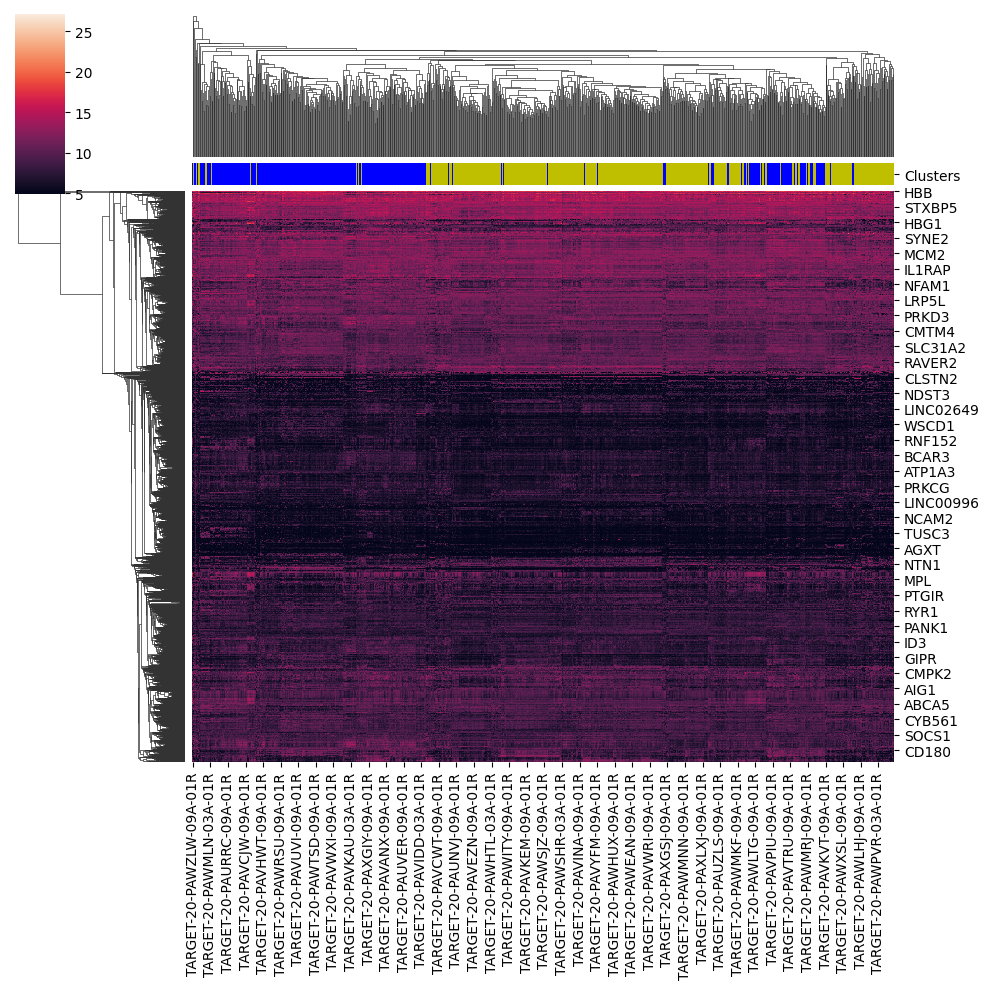

In [17]:
variance_genes = pd.read_csv("../Data/Variance/most_variable_5000.csv", index_col="Unnamed: 0").T
kmeans = KMeans(n_clusters=2, random_state=0).fit(variance_genes)
series = pd.Series(kmeans.labels_)
lut = dict(zip(series.unique(), "by"))
row_colors = series.map(lut)
patients_labels = pd.DataFrame(row_colors.values, variance_genes.index.values).rename(columns={0:"Clusters"})
sns.clustermap(variance_genes.T, col_colors=patients_labels)

C:\Users\mazhu\AppData\Roaming\Python\Python310\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


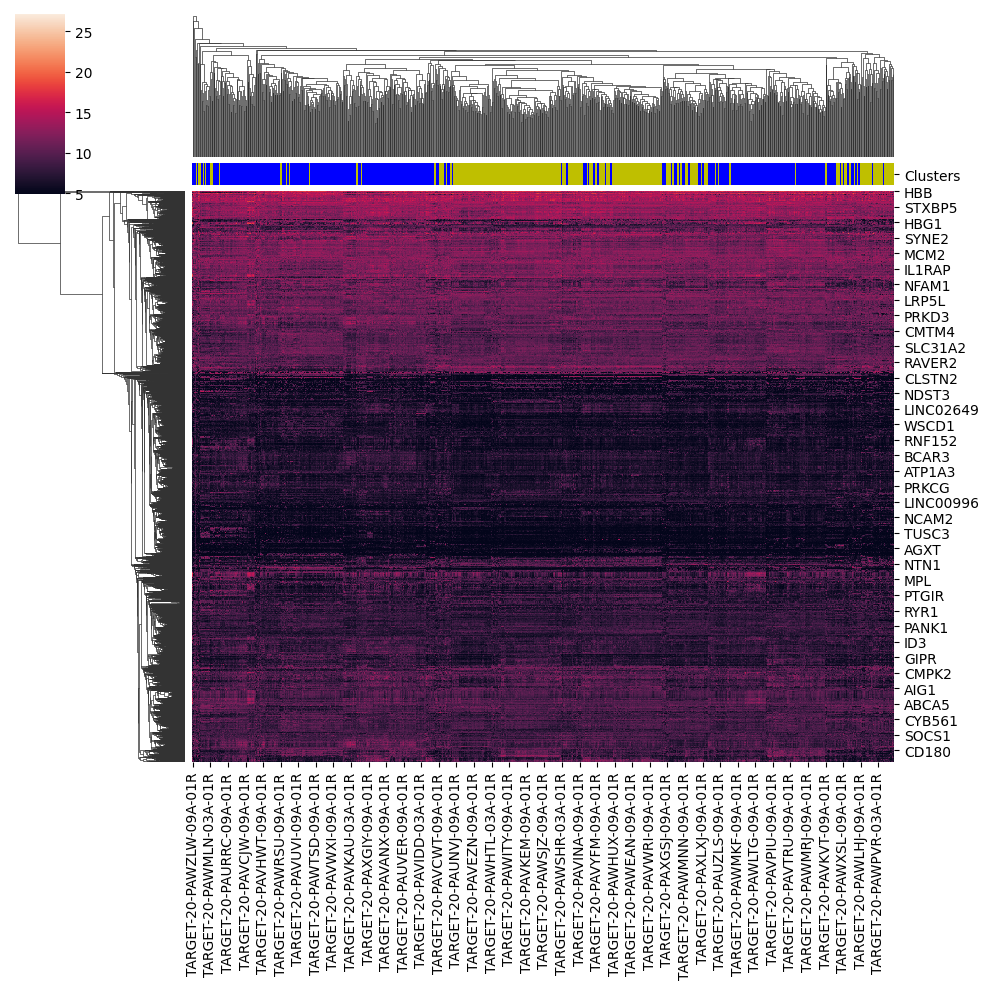

In [13]:
variance_genes = pd.read_csv("../Data/Variance/most_variable_5000.csv", index_col="Unnamed: 0").T
kmedoids = KMedoids(n_clusters=2, method='pam', init='random', random_state=1234).fit(variance_genes)
series = pd.Series(kmedoids.labels_)
lut = dict(zip(series.unique(), "by"))
row_colors = series.map(lut)
patients_labels = pd.DataFrame(row_colors.values, variance_genes.index.values).rename(columns={0:"Clusters"})
sns.clustermap(variance_genes.T, col_colors=patients_labels)

# Sample Sankey

In [45]:
df = pd.read_csv('../Data/sankey.csv') #Read above CSV

#Sort by Source and then Destination
df['source'] = pd.Categorical(df['source'], ['0-10', "11-100", "101-1000", "1001-5000", "5001-10000"])
df['destination'] = pd.Categorical(df['destination'], ["Cluster 1", "Cluster 2"])
df.sort_values(['source', 'destination'], inplace = True)
df.reset_index(drop=True)
df.value.to_list()

[8, 2, 32, 58, 544, 356, 1454, 2546, 2371, 2629]

In [71]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 50,
      line = dict(color = "black", width = 0.5),
      label = ["0-10", "11-100", "101-1000", "1001-5000", "5001-10000", "Cluster 1", "Cluster 2"],
      color = ['#808B96', '#EC7063', '#F7DC6F', '#4710B0', '#AF7AC5', '#48C9B0', '#982910'],
      x = [0.001, 0.001, 0.001, 0.001, 0.001, 0.999, 0.999],
      y = [0.001, 0.07, 0.2, 0.5, 1, 0.2, 0.99]
    ),
    link = dict(
      source = [0, 0, 1, 1, 2, 2, 3, 3, 4, 4],
      target = [5, 6, 5, 6, 5, 6, 5, 6, 5, 6],
      value  = df.value.to_list()
  ))])

fig.update_layout(title_text="Cluster Diagrams, N=10000", font_size=20)
fig.show()

In [85]:
pd.DataFrame([["0 - 10", "Cluster 1", "8 (80%)"], ["", "Cluster 2", "2 (20%)"], ["0 - 100", "Cluster 1", "40 (40%)"], ["", "Cluster 2", "60 (60%)"], 
              ["0 - 1000", "Cluster 1", "584 (58%)"], ["", "Cluster 2", "416 (42%)"], ["0 - 5000", "Cluster 1", "2038 (41%)"], ["", "Cluster 2", "5591 (56%)"], 
              ["0 - 10000", "Cluster 1", "4409 (44%)"], ["", "Cluster 2", "5591 (56%)"]]).rename(columns={0:"Genes", 1:"Cluster", 2:"Cumulative"}).set_index("Genes")

,Cluster,Cumulative
Genes,,
0 - 10,Cluster 1,8 (80%)
,Cluster 2,2 (20%)
0 - 100,Cluster 1,40 (40%)
,Cluster 2,60 (60%)
0 - 1000,Cluster 1,584 (58%)
,Cluster 2,416 (42%)
0 - 5000,Cluster 1,2038 (41%)
,Cluster 2,5591 (56%)
0 - 10000,Cluster 1,4409 (44%)


In [15]:
clinical = pd.read_csv("../Data/clinical_event_sorted.csv").set_index("Unnamed: 0")
variance_genes = pd.read_csv("../Data/Variance/most_variable_5000.csv", index_col="Unnamed: 0").T
clust_obj = KMedoids(n_clusters=2, method='pam', init='random', random_state=1234).fit(variance_genes)
kmedoids_res = clust_obj.fit(variance_genes)
kmedoids = pd.DataFrame(kmedoids_res.labels_, variance_genes.index).rename(columns={0:"KMedoids"})
pcc = pd.DataFrame(clinical["Primary Cytogenetic Code"])

In [16]:
df = kmedoids.join(pcc)
df.value_counts()

KMedoids  Primary Cytogenetic Code
1         MLL                         218
          Other                       190
          Normal                      153
0         t(8;21)                     117
          Normal                      104
          Other                       101
          inv(16)                      95
1         t(8;21)                      26
0         MLL                          18
          Unknown                       6
1         inv(16)                       6
          Unknown                       4
dtype: int64

In [10]:
import scipy.stats as stats

In [20]:
temp = pd.DataFrame(([18, 218], [153, 104], [95, 6], [117, 26], [6, 4], [190, 101]))
temp = temp.rename(columns={0:"Cluster 1", 1:"Cluster 2"})
temp = temp.rename({0:"MLL", 1:"Normal", 2:"inv(16)", 3:"t(8;21)", 4:"Unknown", 5:"Other"})


print(stats.chi2_contingency(observed= temp))
print(temp)

(333.37136648754705, 6.644175766648129e-70, 5, array([[131.6416185 , 104.3583815 ],
       [143.35549133, 113.64450867],
       [ 56.33815029,  44.66184971],
       [ 79.76589595,  63.23410405],
       [  5.57803468,   4.42196532],
       [162.32080925, 128.67919075]]))
         Cluster 1  Cluster 2
MLL             18        218
Normal         153        104
inv(16)         95          6
t(8;21)        117         26
Unknown          6          4
Other          190        101


# Assessing goodness of fit of clustering results

It is necessary to compare the results of each clustering method to the primary cytogenetic code for each sample to determine how well the clustering algorithms model differences in gene expression among the categories of PCC

The following function generates a contingency table for the results of each clustering algorithm. Each sample is mapped to both its PCC and its cluster; the assignments are cross-multiplied to generate the combination of each category, then the frequency of each combination is assessed. The contingency table lists the absolute frequency of each combination of a PCC and a cluster group. 

In [12]:
def compute_cont_table(clust_algo, dimensions=10, clusters=2):
    # Function for computing the contingency table comparing AML primary cytogenetic codes to cluster categories

    # Open dataset of normalized genes and convert to transposed matrix
    data = "../Data/Variance/most_variable_" + str(dimensions) + ".csv"
    var_genes = pd.read_csv(data, index_col="Unnamed: 0").T

    if (clust_algo == 'KMeans'):
        clust_obj = KMeans(n_clusters=clusters, random_state=0)
    if (clust_algo == 'KMedoids'):
        clust_obj = KMedoids(n_clusters=clusters, method='pam', init='random', random_state=1234)

    clust_obj.fit(var_genes)

    # Open the clinical data and slice for PCC
    clinical = pd.read_pickle('../Data/clinical_data.pickle')
    clinical = clinical['Primary Cytogenetic Code'].astype('category')

    # Get cluster assignments for each sample into a series
    clusters = clust_obj.labels_.tolist()
    clusters = pd.Series(clusters, index=var_genes.index, dtype='category', name='cluster')

    # Generate long-format map of samples to PCC and cluster assignment
    sample_map = pd.merge(clinical, clusters, how='outer', right_index=True, left_index=True)
    sample_map.rename(columns={'Primary Cytogenetic Code' : 'PCC'})

    cont_tab = pd.crosstab(clinical, clusters)

    display(cont_tab)
    
    return sample_map, cont_tab;

## Goodness-of-fit of K-Means clustering

The `observed` variable is assigned the contingency table because it enumerates the observed frequencies of each combination for the sample set of 5000 genes. 

In [16]:
sample_map, observed = compute_cont_table('KMeans', dimensions=5000)

cluster,0,1
Primary Cytogenetic Code,,
MLL,29,207
Normal,167,90
Other,155,136
Unknown,6,4
inv(16),91,10
t(8;21),138,5


Using `observed` and scipy stats' [`chi2_contingency` function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html#scipy.stats.chi2_contingency) to assess the goodness-of-fit, we retrieve the chi2 test statistic, the p-value of the test, the degrees of freedom, and the expected frequencies based on the marginal sums of the contingency table.

In [17]:
chi2, p, dof, expected_arr = stats.chi2_contingency(observed)
expected = pd.DataFrame(expected_arr, index=observed.index, columns=observed.columns)
print('Test statistic: ' + str(chi2) + '\np-value: ' + str(p) + '\nDegrees of freedom: ' + str(dof))
display(expected)

Test statistic: 335.92417120986136
p-value: 1.8751950120697158e-70
Degrees of freedom: 5


cluster,0,1
Primary Cytogenetic Code,,
MLL,133.233141,102.766859
Normal,145.088632,111.911368
Other,164.283237,126.716763
Unknown,5.645472,4.354528
inv(16),57.019268,43.980732
t(8;21),80.730250,62.269750


Choosing an $\alpha=0.05$ such that the observed frequencies of a PCC in each cluster are similar to the expected ones and comparing this alpha level to the p-value, we see that $p=1.88\times10^{-70} < \alpha=0.05$. Therefore, the chi-squared fit test demonstrates that the K-Means clustering algorithm failed to identify significantly different gene expressions among categories of PCC. 

## Goodness-of-fit of K-Medoids clustering

Again generate the contingency table of `observed` frequencies of each PCC in each cluster in the sample set of 5000 genes. 

In [14]:
sample_map, observed = compute_cont_table('KMedoids', dimensions=5000)

cluster,0,1
Primary Cytogenetic Code,,
MLL,18,218
Normal,104,153
Other,101,190
Unknown,6,4
inv(16),95,6
t(8;21),117,26


Retrieve the chi2 test statistic, the p-value of the test, the degrees of freedom, and the expected frequencies based on the marginal sums of the contingency table.

In [15]:
chi2, p, dof, expected_arr = stats.chi2_contingency(observed)
expected = pd.DataFrame(expected_arr, index=observed.index, columns=observed.columns)
print('Test statistic: ' + str(chi2) + '\np-value: ' + str(p) + '\nDegrees of freedom: ' + str(dof))
display(expected)

Test statistic: 326.7232448299585
p-value: 1.7906853328611014e-68
Degrees of freedom: 5


cluster,0,1
Primary Cytogenetic Code,,
MLL,100.265896,135.734104
Normal,109.187861,147.812139
Other,123.632948,167.367052
Unknown,4.248555,5.751445
inv(16),42.910405,58.089595
t(8;21),60.754335,82.245665


Choosing an $\alpha=0.05$ such that the observed frequencies of a PCC in each cluster are similar to the expected ones and comparing this alpha level to the p-value, we see that $p=1.79\times10^{-68} < \alpha=0.05$. Therefore, the chi-squared fit test demonstrates that the K-Medoids clustering algorithm failed to identify significantly different gene expressions among categories of PCC. 